In [1]:
import sys
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../bin')
from bin.functions import *
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [23]:
df_res = pd.read_csv("all_result.csv", index_col=0)
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase,max_diff,amplitude,mean,variance,adf_test_pvalue,kpss_test_pvalue
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,0.009146,0.600416,232.30,2566.80,6523.738710,7.535744e+05,0.113077,0.010000
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,0.088896,0.552155,599.00,1533.00,1346.387097,1.432428e+05,0.110802,0.096658
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,0.005387,0.254877,320.00,5620.00,5595.806452,2.732452e+06,0.951878,0.010000
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,0.010918,0.510635,440.00,6290.00,6599.032258,3.248222e+06,0.988328,0.010000
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,0.010289,0.436703,590.00,4860.00,4012.580645,1.727553e+06,0.997930,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,0.052152,3.794788,86.00,7097.00,3312.858131,1.695250e+05,0.000000,0.062011
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,0.007734,0.500734,195.00,6417.00,4104.727642,1.772440e+05,0.000000,0.100000
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,0.007506,0.022866,238.00,348148.00,5449.449057,4.566552e+08,0.497741,0.100000
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,0.003028,0.340748,282.71,3823.38,1606.119072,8.195809e+05,0.515162,0.010000


In [3]:
ts_info = pd.read_csv("../src/M4-methods/Dataset/M4-info.csv")
ts_info

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


In [5]:
mse_list = pd.DataFrame([[0,0,0,0,0] for i in range(12)], ['Demographic','Demographic_sym', 'Finance','Finance_sym', 'Industry','Industry_sym', 'Macro','Macro_sym', 'Micro','Micro_sym', 'Other','Other_sym'], ['mean', 'q1', 'q3', 'ci_low','ci_high'])
smape_list = pd.DataFrame([[0,0,0,0,0] for i in range(12)], ['Demographic','Demographic_sym', 'Finance','Finance_sym', 'Industry','Industry_sym', 'Macro','Macro_sym', 'Micro','Micro_sym', 'Other','Other_sym'], ['mean', 'q1', 'q3', 'ci_low','ci_high'])
mase_list = pd.DataFrame([[0,0,0,0,0] for i in range(12)], ['Demographic','Demographic_sym', 'Finance','Finance_sym', 'Industry','Industry_sym', 'Macro','Macro_sym', 'Micro','Micro_sym', 'Other','Other_sym'], ['mean', 'q1', 'q3', 'ci_low','ci_high'])

In [6]:
def count_statisctic(ts, type):
    symmetry_ts = ts.loc[ts['sym_test']]
    not_symmetry_ts = ts.loc[ts['sym_test'] == False]
    mean = np.mean(not_symmetry_ts['mse'])
    q1 = np.percentile(not_symmetry_ts['mse'], 25)
    q3 = np.percentile(not_symmetry_ts['mse'], 75)
    ci_low, ci_high = np.percentile(not_symmetry_ts['mse'], [2.5, 97.5])
    mse_list.loc[type] = [mean, q1, q3, ci_low, ci_high]
    mean = np.mean(symmetry_ts['mse'])
    q1 = np.percentile(symmetry_ts['mse'], 25)
    q3 = np.percentile(symmetry_ts['mse'], 75)
    ci_low, ci_high = np.percentile(symmetry_ts['mse'], [2.5, 97.5])
    mse_list.loc[type+"_sym"] = [mean, q1, q3, ci_low, ci_high]
    mean = np.mean(not_symmetry_ts['smape'])
    q1 = np.percentile(not_symmetry_ts['smape'], 25)
    q3 = np.percentile(not_symmetry_ts['smape'], 75)
    ci_low, ci_high = np.percentile(not_symmetry_ts['smape'], [2.5, 97.5])
    smape_list.loc[type] = [mean, q1, q3, ci_low, ci_high]
    mean = np.mean(symmetry_ts['smape'])
    q1 = np.percentile(symmetry_ts['smape'], 25)
    q3 = np.percentile(symmetry_ts['smape'], 75)
    ci_low, ci_high = np.percentile(symmetry_ts['smape'], [2.5, 97.5])
    smape_list.loc[type+"_sym"] = [mean, q1, q3, ci_low, ci_high]
    mean = np.mean(not_symmetry_ts['mase'])
    q1 = np.percentile(not_symmetry_ts['mase'], 25)
    q3 = np.percentile(not_symmetry_ts['mase'], 75)
    ci_low, ci_high = np.percentile(not_symmetry_ts['mase'], [2.5, 97.5])
    mase_list.loc[type] = [mean, q1, q3, ci_low, ci_high]
    mean = np.mean(symmetry_ts['mase'])
    q1 = np.percentile(symmetry_ts['mase'], 25)
    q3 = np.percentile(symmetry_ts['mase'], 75)
    ci_low, ci_high = np.percentile(symmetry_ts['mase'], [2.5, 97.5])
    mase_list.loc[type+"_sym"] = [mean, q1, q3, ci_low, ci_high]

In [9]:
ts_macro = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Macro"]["M4id"].values)]
count_statisctic(ts_macro, "Macro")
ts_demog = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Demographic"]["M4id"].values)]
count_statisctic(ts_demog, "Demographic")
ts_finance = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Finance"]["M4id"].values)]
count_statisctic(ts_finance, "Finance")
ts_industry = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Industry"]["M4id"].values)]
count_statisctic(ts_industry, "Industry")
ts_micro = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Micro"]["M4id"].values)]
count_statisctic(ts_micro, "Micro")
ts_other = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Other"]["M4id"].values)]
count_statisctic(ts_other, "Other")

In [12]:
mase_list

,mean,q1,q3,ci_low,ci_high
Demographic,0.576846,0.273621,0.679395,0.082061,2.028135
Demographic_sym,0.657126,0.364066,0.758669,0.149674,1.741530
Finance,0.843729,0.234044,0.924929,0.053213,3.602180
Finance_sym,0.830519,0.325365,0.902735,0.086732,3.144542
Industry,0.720916,0.236742,0.803503,0.060511,2.969414
Industry_sym,0.850095,0.372771,0.940996,0.107708,2.952942
Macro,0.695426,0.219919,0.773224,0.052354,2.810607
Macro_sym,0.695892,0.268853,0.809989,0.097920,2.685830
Micro,0.737690,0.247646,0.893867,0.055917,2.847645
Micro_sym,0.638344,0.232357,0.730198,0.079762,2.528116


In [13]:
mse_list

,mean,q1,q3,ci_low,ci_high
Demographic,1.275524e+05,809.473445,23911.915507,35.074492,8.888919e+05
Demographic_sym,6.615895e+05,3041.596028,93238.032004,137.577112,2.156058e+06
Finance,5.724699e+05,2059.881298,89360.639137,46.366136,3.245234e+06
Finance_sym,2.184061e+06,13269.901928,574161.544415,207.431695,1.134871e+07
Industry,4.360075e+05,1716.216602,85118.784515,46.731031,3.129158e+06
Industry_sym,1.298358e+06,10045.989885,465821.644374,156.513535,9.143093e+06
Macro,3.229350e+05,1238.057414,61942.784915,31.012514,2.211475e+06
Macro_sym,1.199889e+06,10382.924839,377366.684339,239.203055,8.527685e+06
Micro,3.579551e+05,1373.108851,55443.091900,17.532116,1.817191e+06
Micro_sym,1.143931e+06,7561.506976,326724.040110,86.954702,5.853373e+06


In [14]:
smape_list

,mean,q1,q3,ci_low,ci_high
Demographic,0.023849,0.006262,0.027996,0.002155,0.107589
Demographic_sym,0.046520,0.012622,0.055438,0.004192,0.211702
Finance,0.040370,0.008186,0.041946,0.002078,0.234677
Finance_sym,0.109290,0.028563,0.148339,0.005751,0.428723
Industry,0.040305,0.008093,0.040054,0.002255,0.226972
Industry_sym,0.110348,0.027591,0.144273,0.005741,0.467867
Macro,0.035359,0.007122,0.038588,0.001607,0.177672
Macro_sym,0.096611,0.029156,0.127758,0.005678,0.369617
Micro,0.031595,0.007955,0.033750,0.000948,0.157127
Micro_sym,0.095051,0.026373,0.129487,0.003401,0.358290


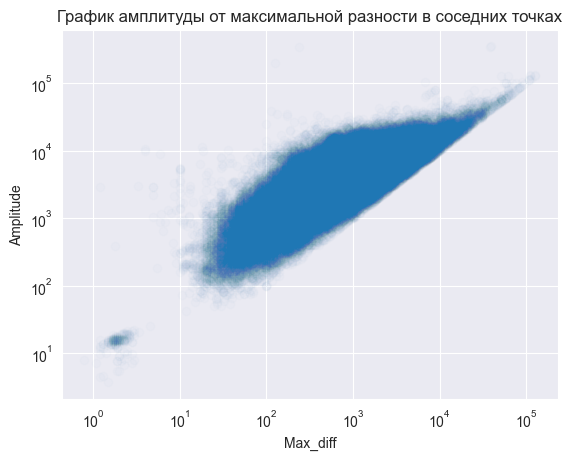

In [10]:
plt.scatter(df_res["max_diff"], df_res["amplitude"], alpha= 0.01)

plt.ylabel('Amplitude')
plt.xlabel('Max_diff')
plt.title('График амплитуды от максимальной разности в соседних точках')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

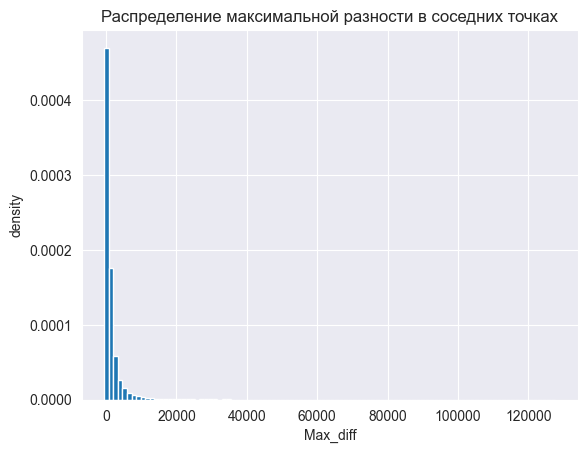

In [11]:
plt.hist(df_res["max_diff"], density=True, bins=100)

plt.ylabel("density")
plt.xlabel('Max_diff')
plt.title('Распределение максимальной разности в соседних точках')
# Отображение графика
plt.show()

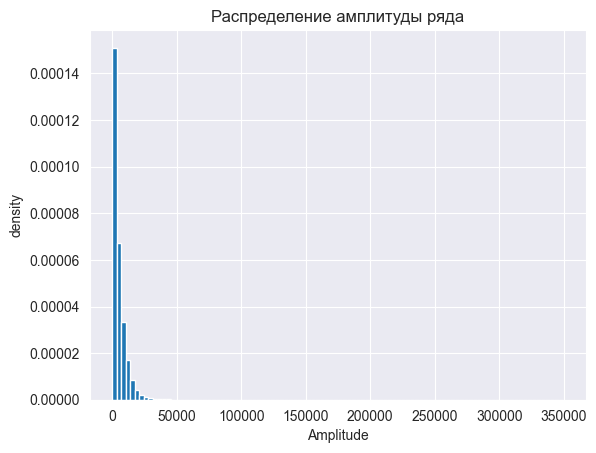

In [12]:
plt.hist(df_res["amplitude"], density=True, bins=100)

plt.ylabel("density")
plt.xlabel('Amplitude')
plt.title('Распределение амплитуды ряда')
# Отображение графика
plt.show()

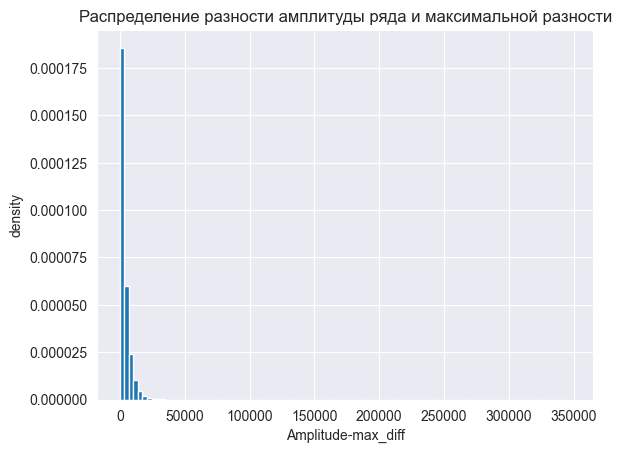

In [39]:
plt.hist(df_res["amplitude"]-df_res["max_diff"], density=True, bins=100)

plt.ylabel("density")
plt.xlabel('Amplitude-max_diff')
plt.title('Распределение разности амплитуды ряда и максимальной разности')

# Отображение графика
plt.show()

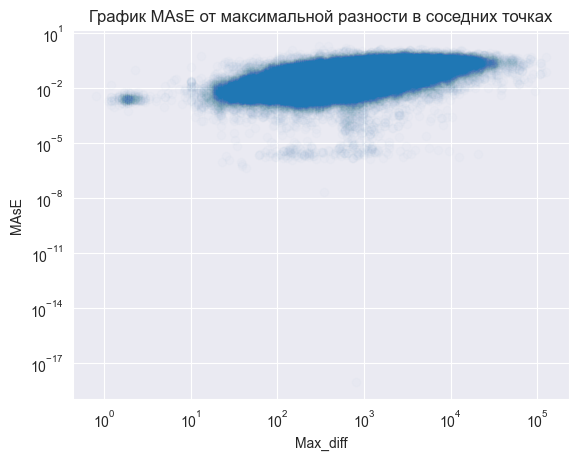

In [18]:
plt.scatter(df_res["max_diff"], df_res["mase"], alpha=0.01)

plt.ylabel('MAsE')
plt.xlabel('Max_diff')
plt.title('График MAsE от максимальной разности в соседних точках')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

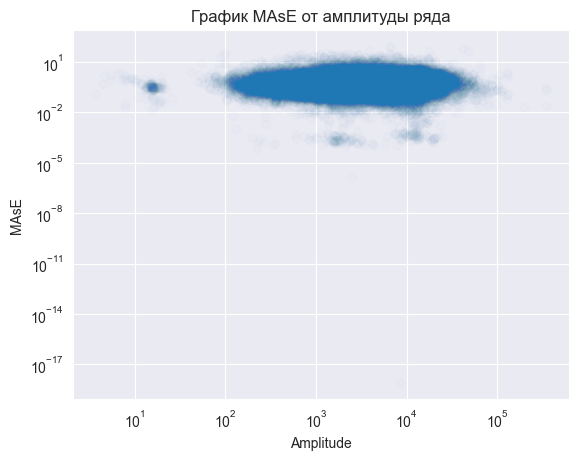

In [20]:
plt.scatter(df_res["amplitude"], df_res["mase"], alpha=0.01)

plt.ylabel('MAsE')
plt.xlabel('Amplitude')
plt.title('График MAsE от амплитуды ряда')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

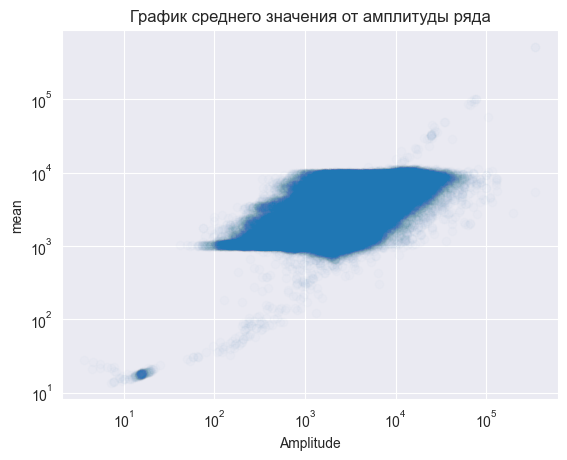

In [25]:
plt.show()
plt.scatter(df_res["amplitude"], df_res["mean"], alpha=0.01)

plt.ylabel('mean')
plt.xlabel('Amplitude')
plt.title('График среднего значения от амплитуды ряда')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

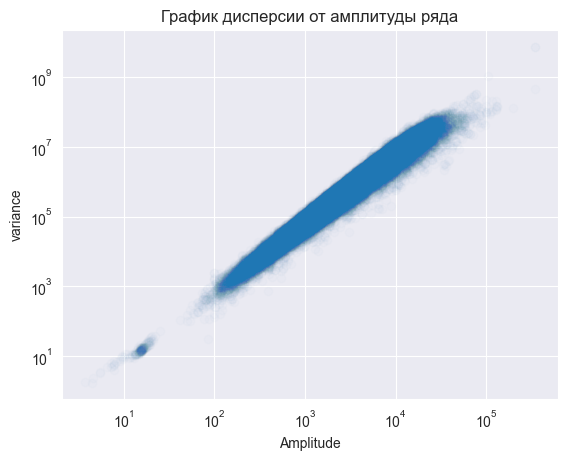

In [30]:
plt.show()
plt.show()
plt.scatter(df_res["amplitude"], df_res["variance"], alpha=0.01)

plt.ylabel('variance')
plt.xlabel('Amplitude')
plt.title('График дисперсии от амплитуды ряда')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

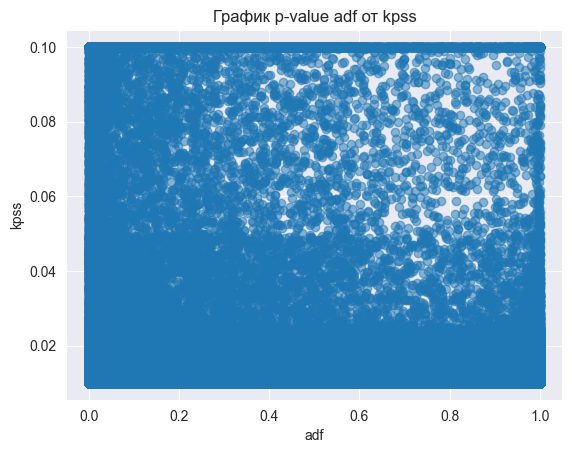

In [28]:
plt.show()
plt.scatter(df_res["adf_test_pvalue"], df_res["kpss_test_pvalue"], alpha=0.5)

plt.ylabel('kpss')
plt.xlabel('adf')
plt.title('График p-value adf от kpss')
# Отображение графика
plt.show()

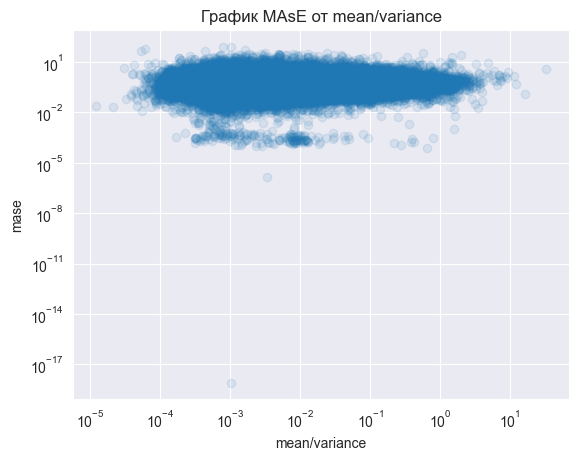

In [35]:
plt.scatter(df_res["mean"]/df_res["variance"], df_res["mase"], alpha=0.1)

plt.xlabel('mean/variance')
plt.ylabel('mase')
plt.title('График MAsE от mean/variance')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

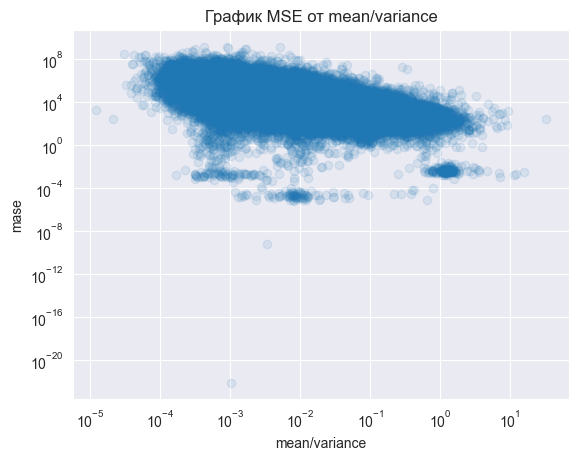

In [44]:
plt.scatter(df_res["mean"]/df_res["variance"], df_res["mse"], alpha=0.1)

plt.xlabel('mean/variance')
plt.ylabel('mase')
plt.title('График MSE от mean/variance')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

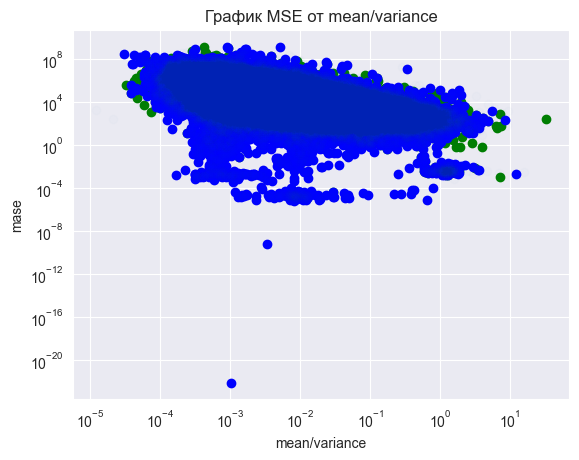

In [43]:
plt.scatter(df_res.loc[df_res["adf_test_pvalue"]<0.05]["mean"] / df_res.loc[df_res["adf_test_pvalue"]<0.05]["variance"], df_res.loc[df_res["adf_test_pvalue"]<0.05]["mse"], color="green")
plt.scatter(df_res.loc[df_res["kpss_test_pvalue"]<0.05]["mean"] / df_res.loc[df_res["kpss_test_pvalue"]<0.05]["variance"], df_res.loc[df_res["kpss_test_pvalue"]<0.05]["mse"], color="blue")
plt.scatter(df_res["mean"]/df_res["variance"], df_res["mse"], alpha=0.01)
plt.xlabel('mean/variance')
plt.ylabel('mase')
plt.title('График MSE от mean/variance')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

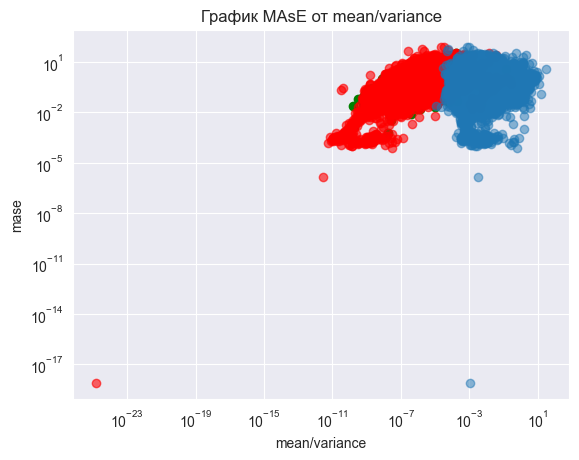

In [53]:
plt.scatter(
    df_res.loc[df_res["adf_test_pvalue"] < 0.05]["mase"] / df_res.loc[df_res["adf_test_pvalue"] < 0.05]["variance"],
    df_res.loc[df_res["adf_test_pvalue"] < 0.05]["mase"], color="green")
plt.scatter(
    df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["mase"] / df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["variance"],
    df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["mase"], color="red", alpha=0.6)
plt.scatter(df_res["mean"] / df_res["variance"], df_res["mase"], alpha=0.5)
plt.xlabel('mean/variance')
plt.ylabel('mase')
plt.title('График MAsE от mean/variance')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

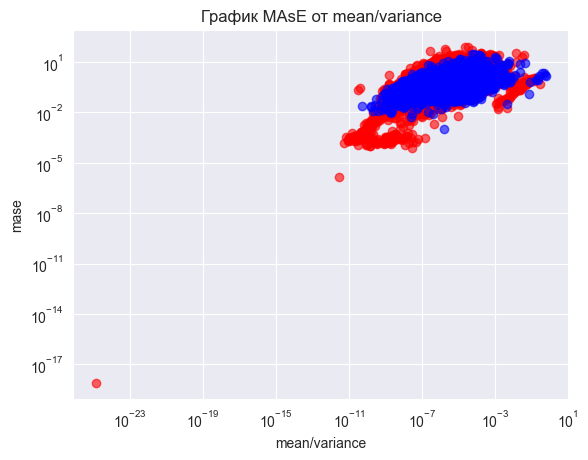

In [56]:
plt.scatter(
    df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["mase"] / df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["variance"],
    df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["mase"], color="red", alpha=0.6)
plt.scatter(
    df_res.loc[df_res["kpss_test_pvalue"] >= 0.1]["mase"] / df_res.loc[df_res["kpss_test_pvalue"] >= 0.1]["variance"],
    df_res.loc[df_res["kpss_test_pvalue"] >= 0.1]["mase"], color="blue", alpha=0.6)
plt.xlabel('mean/variance')
plt.ylabel('mase')
plt.title('График MAsE от mean/variance')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

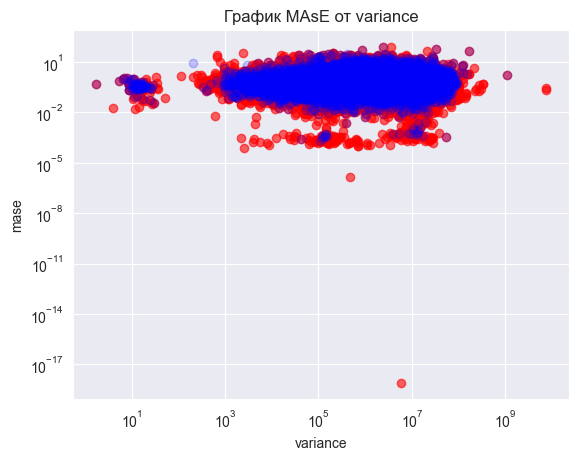

In [65]:
plt.scatter(
    df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["variance"],
    df_res.loc[df_res["kpss_test_pvalue"] < 0.05]["mase"], color="red", alpha=0.6)
plt.scatter(
    df_res.loc[df_res["adf_test_pvalue"] >= 0.9]["variance"],
    df_res.loc[df_res["adf_test_pvalue"] >= 0.9]["mase"], color="blue", alpha=0.2)
plt.xlabel('variance')
plt.ylabel('mase')
plt.title('График MAsE от variance')
plt.semilogy()
plt.semilogx()
# Отображение графика
plt.show()

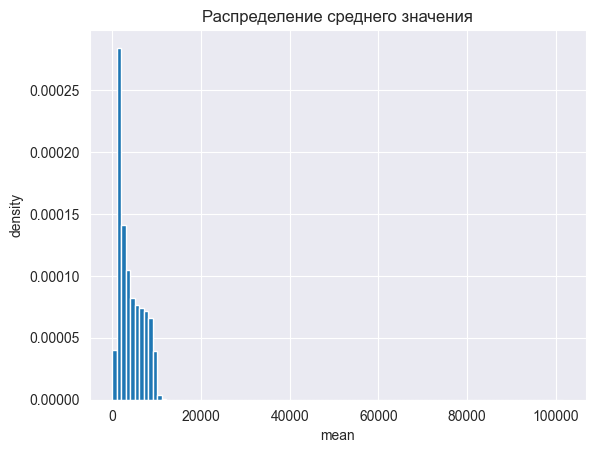

In [75]:
plt.hist(df_res[df_res["mean"]<=200000]["mean"], bins=100, density=True)

plt.ylabel("density")
plt.xlabel('mean')
plt.title('Распределение среднего значения')
# Отображение графика
plt.show()

In [72]:
df_res[df_res["mean"]>200000]

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase,max_diff,amplitude,mean,variance,adf_test_pvalue,kpss_test_pvalue
56,H57,NaN,0.426391,4.904619e+07,0.010650,False,0.257703,0.010602,0.303673,39345.0,349457.0,524855.040000,7.620296e+09,0.825768,0.01
120,H121,NaN,0.427705,3.038963e+07,0.007581,False,0.256800,0.007565,0.228306,38073.0,343158.0,516871.464286,7.409161e+09,0.895472,0.01


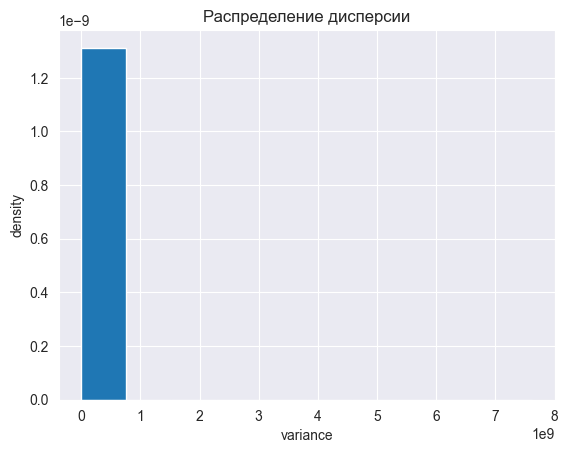

In [77]:
plt.hist(df_res["variance"], density=True)

plt.ylabel("density")
plt.xlabel('variance')
plt.title('Распределение дисперсии')
# Отображение графика
plt.show()

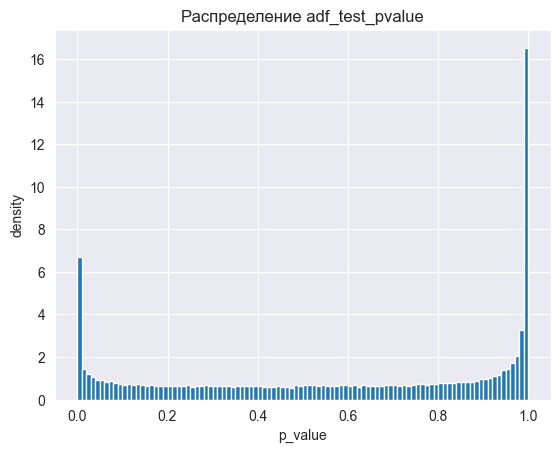

In [78]:
plt.hist(df_res["adf_test_pvalue"], density=True, bins=100)

plt.ylabel("density")
plt.xlabel('p_value')
plt.title('Распределение adf_test_pvalue')
# Отображение графика
plt.show()

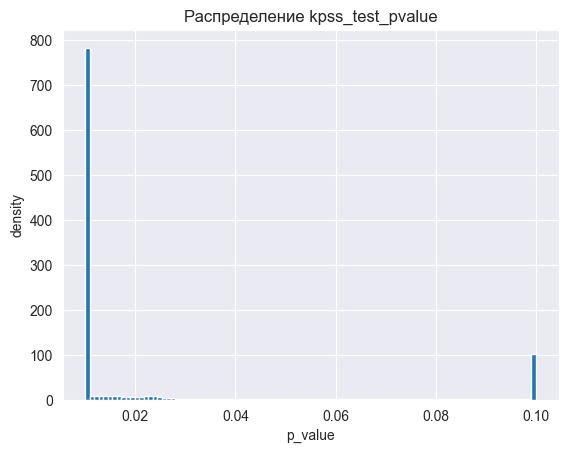

In [79]:
plt.hist(df_res["kpss_test_pvalue"], density=True, bins=100)

plt.ylabel("density")
plt.xlabel('p_value')
plt.title('Распределение kpss_test_pvalue')
# Отображение графика
plt.show()